In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
plt.style.use('seaborn')


In [32]:
data = pd.read_pickle('dh_mi_dataset.pkl')
data.death = data.death.astype('int16')



In [34]:
data = pd.read_pickle('./dataset/lab_dataset.pkl')

In [50]:
data


,stay_id,wbc,rbc,hematocrit_x,hemoglobin_x,mch,mchc,mcv,rdw,platelet,inr,pt,ptt,death
0,30000153,16.100000,3.185000,30.957143,10.300000,32.400000,33.900000,95.500000,13.400000,167.500000,1.100000,13.200000,25.299999,0
2,30000484,21.800000,2.815000,25.700000,8.550000,30.400000,33.250000,91.500000,18.100000,345.000000,1.400000,16.100000,38.849998,0
3,30000646,8.550000,4.362500,38.700000,13.100000,30.000000,33.824999,88.750000,15.225000,275.250000,1.400000,15.200000,35.200001,0
4,30001148,11.300000,3.385000,31.566667,10.900000,32.300000,34.200001,94.500000,14.050000,187.500000,1.200000,13.600000,29.500000,0
5,30001336,7.966667,2.990000,26.566666,8.866666,29.666667,33.400000,89.000000,12.000000,171.333333,1.466667,16.033333,60.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76512,39999230,5.766667,2.710000,26.033333,8.266667,30.566667,31.900000,96.000000,15.166667,199.666667,1.900000,20.533333,38.700001,0
76513,39999286,16.400000,3.383333,30.575000,10.533333,31.066667,33.966667,91.333333,15.600000,139.000000,1.000000,11.800000,31.000000,0
76514,39999301,9.450000,3.915000,35.399999,12.350000,31.450000,34.299999,92.000000,14.400000,194.500000,1.100000,13.400000,26.500000,0
76516,39999552,8.800000,3.593333,32.760001,11.200000,31.233333,34.000000,92.000000,13.933333,175.333333,1.100000,12.300000,29.400000,0


In [36]:
data.rename(columns={'dead':'death'},inplace=True)

In [37]:
data.describe().astype('int').T


,count,mean,std,min,25%,50%,75%,max
stay_id,62374,34993119,2888112,30000153,32492381,34994723,37492863,39999810
wbc,62374,11,8,0,7,10,14,464
rbc,62374,3,0,1,3,3,3,7
hematocrit_x,62374,31,5,10,27,30,35,65
hemoglobin_x,62374,10,1,3,8,10,11,20
mch,62374,29,2,15,28,30,31,47
mchc,62374,32,1,24,31,33,34,45
mcv,62374,91,6,53,87,91,95,135
rdw,62374,15,2,10,13,14,16,33
platelet,62374,200,106,5,132,183,247,1970


In [38]:
corr=data.corr()
corr[corr>0.7]


,stay_id,wbc,rbc,hematocrit_x,hemoglobin_x,mch,mchc,mcv,rdw,platelet,inr,pt,ptt
stay_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wbc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rbc,NaN,NaN,1.000000,0.913213,0.887919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hematocrit_x,NaN,NaN,0.913213,1.000000,0.961761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hemoglobin_x,NaN,NaN,0.887919,0.961761,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mch,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.827421,NaN,NaN,NaN,NaN,NaN
mchc,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
mcv,NaN,NaN,NaN,NaN,NaN,0.827421,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
rdw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
platelet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


<AxesSubplot:>

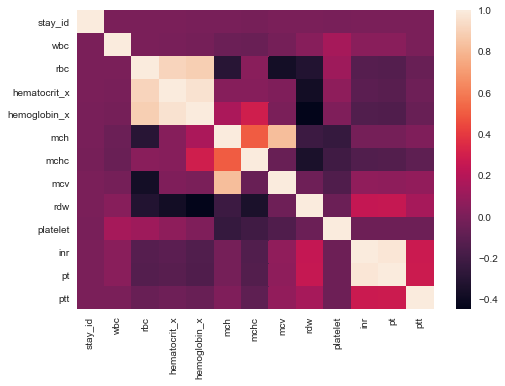

In [39]:
sns.heatmap(corr)


In [40]:
from lightgbm import LGBMClassifier
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report,roc_curve, accuracy_score,precision_score,recall_score
from sklearn.pipeline import Pipeline


In [69]:
# make dataset
#X_r =data[['wbc','rbc','hematocrit_x','hemoglobin_x','mch','mchc','mcv','rdw','platelet','inr','pt','ptt']]
X_r =data[['wbc','hematocrit_x','mchc','mcv','rdw','platelet','pt','ptt']]
y_r = data['death'].astype(int)
#smote(unsampling)
smote = SMOTE(random_state = 101)
X,y = smote.fit_resample(X_r,y_r)

X_train_r, X_test_r, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)




In [58]:
# make dataset for imbalanced ( for validation set)
#X_r =data[['wbc','rbc','hematocrit_x','hemoglobin_x','mch','mchc','mcv','rdw','platelet','inr','pt','ptt']]
X =data[['wbc','rbc','mchc','mcv','rdw','platelet','pt','ptt']]
y = data['death'].astype(int)


X_train_r, X_test_r, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='death', ylabel='count'>

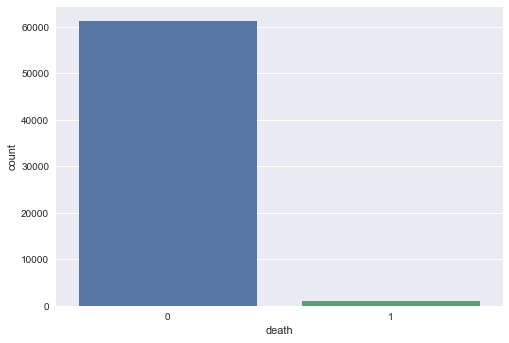

In [59]:
sns.countplot(y_r)


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='death', ylabel='count'>

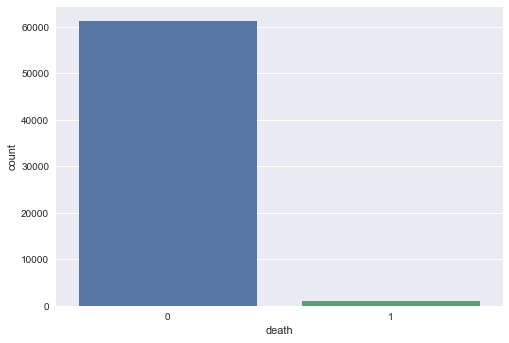

In [60]:
sns.countplot(y)


In [70]:
#scailing
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train_r)
X_test = scalar.fit_transform(X_test_r)

In [76]:
#tuning
base_params = {
    "boosting_type": "gbdt" ,
    "objective": "binary" , 
    "metric": "binary_logloss" , 
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
param_gird = {
    "learning_rate":[0.04,0.05],
    "max_bin":[512,1000,1900,2000],
    "num_leaves":[100,250,270],
    "min_data_in_leaf":[5,10,15]
}

model = LGBMClassifier(**base_params)

# pipeline
pipe = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('base_model', model)
])

grid_model = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, n_jobs=-1)
grid_model.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_data=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=5, min_data=100 will be ignored. Current value: min_data_in_leaf=5


GridSearchCV(cv=5,
             estimator=LGBMClassifier(boost_from_average=True,
                                      metric='binary_logloss', min_data=100,
                                      objective='binary', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.04, 0.05],
                         'max_bin': [512, 1000, 1900, 2000],
                         'min_data_in_leaf': [5, 10, 15],
                         'num_leaves': [100, 250, 270]})

In [77]:
print(grid_model.score(X_train,y_train))
print(grid_model.score(X_test,y_test))


0.971605227984614
0.8603436313920745


In [78]:
es=grid_model.best_estimator_
es

LGBMClassifier(boost_from_average=True, learning_rate=0.05, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=5,
               num_leaves=270, objective='binary', verbose=-1)

In [47]:
#1 temp

LGBMClassifier(boost_from_average=True, learning_rate=0.05, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=20,
               num_leaves=250, objective='binary', verbose=-1)

LGBMClassifier(boost_from_average=True, learning_rate=0.05, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=20,
               num_leaves=250, objective='binary', verbose=-1)

In [61]:
# 2 not imbalanced data processing model
nlgb=LGBMClassifier(boost_from_average=True, learning_rate=0.05, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=15,
               num_leaves=270, objective='binary', verbose=-1)

nlgb.fit(X_train,y_train)

y_pred = nlgb.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_data=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=15, min_data=100 will be ignored. Current value: min_data_in_leaf=15
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     10933
           1       0.59      0.16      0.25      1542

    accuracy                           0.88     12475
   macro avg       0.74      0.57      0.59     12475
weighted avg       0.86      0.88      0.85     12475

0.5709235583366342


In [80]:
lgbm = LGBMClassifier(**grid_model.best_params_)


In [81]:
lgbm.fit(X_train,y_train)


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


LGBMClassifier(learning_rate=0.05, max_bin=2000, min_data_in_leaf=5,
               num_leaves=270)

In [82]:

y_pred = lgbm.predict(X_test)



In [83]:
grid_model.best_score_


0.9528828403903183

In [24]:
grid_model.cv_results_.keys()

#sns.heatmap(data=)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_bin', 'param_min_data_in_leaf', 'param_num_leaves', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [71]:
params = {
    "max_bin": 512,
    "learning_rate": 0.01 , 
    "boosting_type": "gbdt" ,
    "objective": "binary" , 
    "metric": "binary_logloss" , 
    "num_leaves": 100,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    'min_data_in_leaf':5
}

params2 = {
    "max_bin": 2000,
    "learning_rate": 0.01 ,
    "boosting_type": "gbdt" ,  
    "objective": "binary" , 
    "metric": "binary_logloss" , 
    "num_leaves": 250,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    'min_data_in_leaf':5
}

In [72]:
lgbm2 = LGBMClassifier(**params2)

In [73]:
lgbm2.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_data=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=5, min_data=100 will be ignored. Current value: min_data_in_leaf=5


LGBMClassifier(boost_from_average=True, learning_rate=0.01, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=5,
               num_leaves=250, objective='binary', verbose=-1)

In [74]:
y_pred2 = lgbm2.predict(X_test)

In [75]:
roc_auc_score(y_test,y_pred2)

0.8350287732859764

In [63]:
#explainer =  shap.TreeExplainer(lgbm)
explainer =  shap.TreeExplainer(nlgb)
shap_values =  explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [64]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])

In [65]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:])


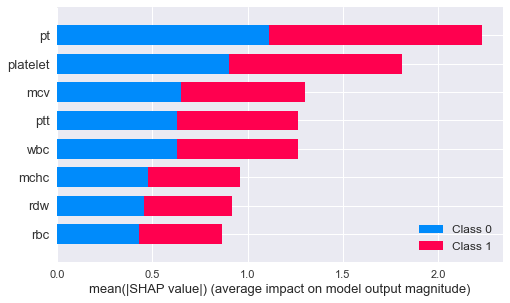

In [66]:
# case value_counts
shap.initjs()
shap.summary_plot(shap_values, X)


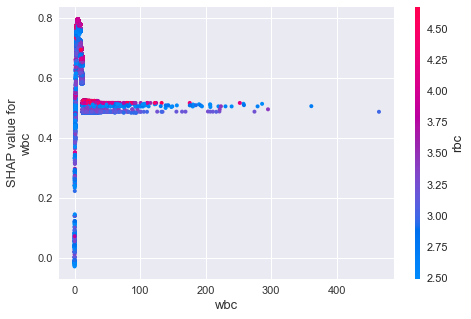

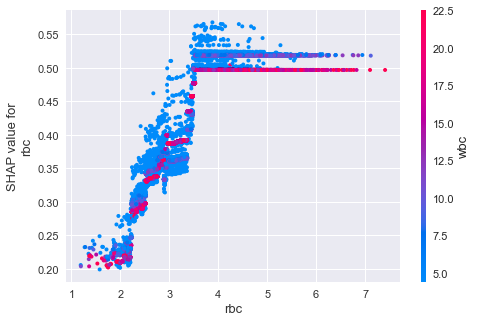

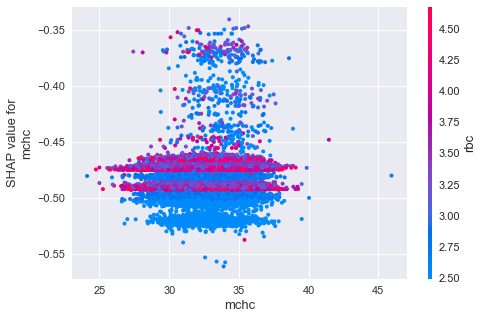

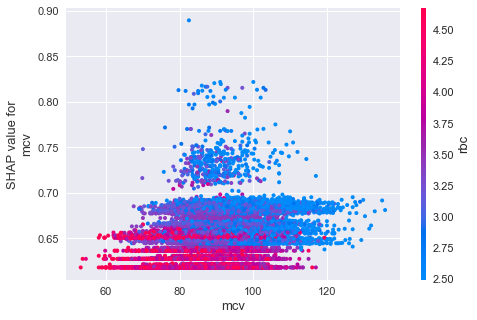

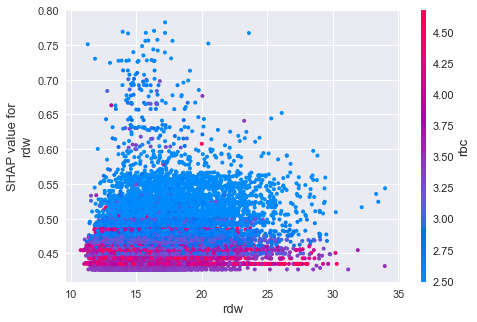

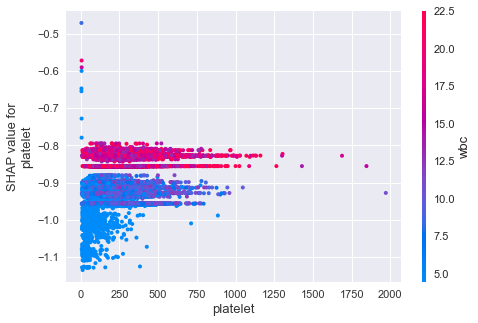

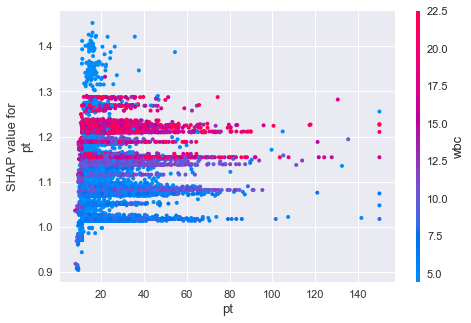

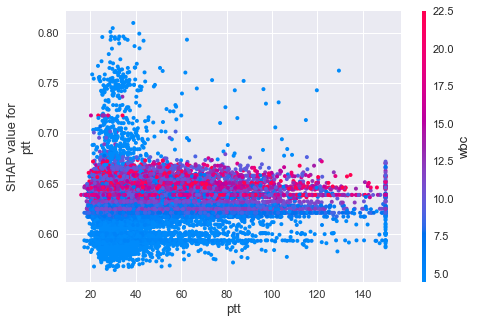

In [67]:
for name in pd.DataFrame(X_train).columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X)
    

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59     11038
           1       0.63      0.94      0.75     10936

    accuracy                           0.69     21974
   macro avg       0.76      0.69      0.67     21974
weighted avg       0.76      0.69      0.67     21974



In [54]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     11038
           1       0.72      0.79      0.76     10936

    accuracy                           0.75     21974
   macro avg       0.75      0.75      0.74     21974
weighted avg       0.75      0.75      0.74     21974



validated auc_score 0.861 
imbalanced data processed

              precision    recall  f1-score   support

    negaitve       0.97      0.74      0.84     12277
    positive       0.79      0.98      0.87     12226

    accuracy                           0.86     24503
   macro avg       0.88      0.86      0.86     24503
weighted avg       0.88      0.86      0.86     24503



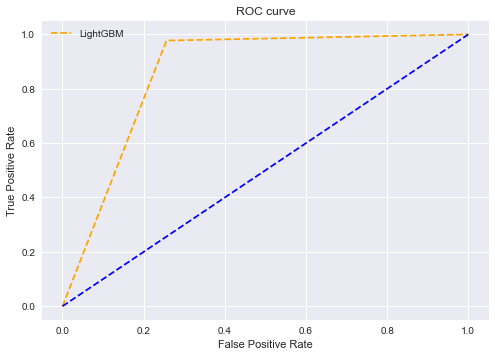

In [84]:
fpr, tpr, threst = roc_curve(y_test, y_pred, pos_label=1)
random_prob = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_pred)
print(f'validated auc_score {auc_score:.3f} \nimbalanced data processed\n')
print(f"{classification_report(y_test, y_pred, target_names=['negaitve', 'positive'])}")
plt.plot(fpr, tpr, linestyle='--', color='orange', label='LightGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_imbd_tfidf.png', dpi=300)
plt.show()